In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models, activations
import matplotlib.pyplot as plt

In [1]:
import nussl

SoX could not be found!

    If you do not have SoX, proceed here:
     - - - http://sox.sourceforge.net/ - - -

    If you do (or think that you should) have SoX, double-check your
    path variables.
    
There was a problem when trying to write in your cache folder (C:\Users\cobyw/.cache\huggingface\hub). You should set the environment variable TRANSFORMERS_CACHE to a writable directory.


In [3]:
N = 32
L = 8

In [ ]:
import musdb



In [2]:
model = models.Model()
model.add(layers.Conv1d(N,
                        L,
                        activation='prelu'))

In [ ]:
class TemporalConvNet(layers.Layer):
    def __init__(self):
        """
        Args:
            N: Number of filters in autoencoder
            B: Number of channels in bottleneck 1 × 1-conv block
            H: Number of channels in convolutional blocks
            P: Kernel size in convolutional blocks
            X: Number of convolutional blocks in each repeat
            R: Number of repeats
            C: Number of speakers
            norm_type: BN, gLN, cLN
            causal: causal or non-causal
            mask_nonlinear: use which non-linear function to generate mask
        """
        super(TemporalConvNet, self).__init__()

        layer_norm = layer_norm
        
        bottleneck_conv = layers.Conv1D(N,1,activation=layers.PReLU())

        repeats = []
        for r in range(R):
            blocks = []
            for x in range(X):
                dilation = 2**x
                blocks += [Conv1DBlock()]
            repeats += [model.Sequential(blocks)]

        tempconv = model.Sequential(repeats)

        mask_conv1x1 = layers.Conv1D(N,C*N,activation=layers.PReLU())

        self.network = model.Sequential(layer_norm,
                                        bottleneck_conv,
                                        tempconv,
                                        mask_conv1x1)

        
    def forward(self, mixture_w):

        M, N, K = mixture_w.size()

        score = self.network(mixture_w)  # [M, N, K] -> [M, C*N, K]
        score = score.view(M, self.C, N, K) # [M, C*N, K] -> [M, C, N, K]

        est_mask = activations.relu(score)

        return est_mask


In [ ]:
class Conv1DBlock(layers.Layer):
    def __init__(self):
        """
        Args:
            N: Number of filters in autoencoder
            B: Number of channels in bottleneck 1 × 1-conv block
            H: Number of channels in convolutional blocks
            P: Kernel size in convolutional blocks
            X: Number of convolutional blocks in each repeat
            R: Number of repeats
            C: Number of speakers
            norm_type: BN, gLN, cLN
            causal: causal or non-causal
            mask_nonlinear: use which non-linear function to generate mask
        """
        super(TemporalConvNet, self).__init__()
        
        self.pwConv1 = layers.Conv1D(N,1,activation=layers.PReLU())
        self.normalize1 = nn.normalize(casual=True)
        self.Dconv = layers.DepthwiseConv1D(L,activation=layers.PReLU())
        self.normalize2 = nn.normalize(casual=True)

        self.skipconn = layers.Conv1D(N,C*N,activation=layers.PReLU())

        skipconn = layers.Conv1D(N,C*N,activation=layers.PReLU())

        if casual:
            self.net = models.Sequential(self.pwConv1,
                                        self.normalize1, 
                                        self.Dconv, 
                                        self.normalize2, 
                                        self.skipconn)
        else:
            self.net = models.Sequential(self.pwConv1,
                                        self.normalize1, 
                                        self.Dconv, 
                                        self.normalize2, 
                                        self.skipconn)
        
    def forward(self, mixture_w):

        M, N, K = mixture_w.size()

        score = self.network(mixture_w)  # [M, N, K] -> [M, C*N, K]
        score = score.view(M, self.C, N, K) # [M, C*N, K] -> [M, C, N, K]

        est_mask = activations.relu(score)

        return est_mask


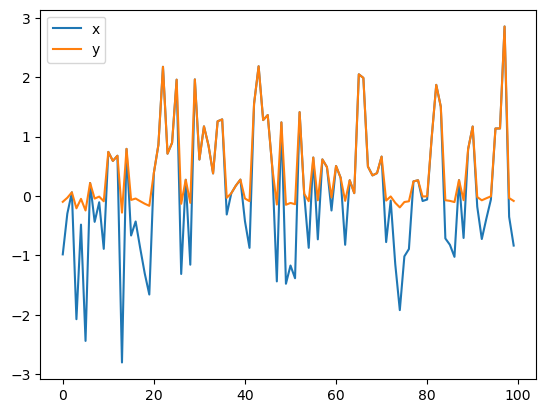

In [12]:
x = np.random.randn(100)
y = layers.PReLU(alpha_initializer=tf.keras.initializers.Constant(value=0.1))(x)

plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()

In [15]:
x = np.random.randn(28,28,3)
y = layers.DepthwiseConv1D(3,2,activation='relu')(x)

y.shape

TensorShape([28, 13, 3])

In [17]:
x = np.random.randn(28,28,2)
y1 = layers.Dense(2)(x)
y2 = layers.Conv1D(2,1)(x)

print(y1.shape, y2.shape)

(28, 28, 2) (28, 28, 2)
